# Keras implementation of the simple NN that classifies bundle stability (cf. Section 2.1)

In [1]:
from __future__ import print_function  # for backwards compatibility: uses print() also in python2

from keras.models import Sequential  # feed forward NN
from keras.layers import Dense  # need only fully connected (dense) layers
from keras import optimizers  # use ADAM optimizer
import numpy as np

# display plots in notebook
%matplotlib inline
import matplotlib as mpl  # for plotting
import matplotlib.pyplot as plt  # for plotting
from mpl_toolkits.mplot3d import Axes3D  # for plotting

# Optional: Seed the random number generator for reproducibility
seed = 0
np.random.seed(seed)
rng = np.random.RandomState(seed)

Using TensorFlow backend.


## Read in the full data set

In [2]:
# This step is different for every training set. In the case at hand, the training data is just a .txt file with an array
# (It is an array of arrays of the form
# [[[x_0^0,x_1^0], y^0], [[x_0^1,x_1^1], y^1], ...]
# The [x_0^i, x_1^i] are integers and the y^i are labels (0: unstable, 1: stable)
hnd = open("../stability_data.txt", "r")
all_data = eval(hnd.read())

## Perform a train:test split 

In [3]:
# helper function to create random batches
def shuffle_trainset(x_train, y_train):
    assert len(x_train) == len(y_train)
    new_order = np.random.permutation(len(x_train))
    new_x = [x_train[i] for i in new_order]
    new_y = [y_train[i] for i in new_order]

    return new_x, new_y

# shuffle the entire data set once to get random train and test pairs
rng.shuffle(all_data)

# perform a train:test split of 80:20
split_point = int(len(all_data)*0.8)
x_train, x_test = [x[0] for x in all_data[0:split_point]], [x[0] for x in all_data[split_point+1:]]
y_train, y_test = [[x[1]] for x in all_data[0:split_point]], [[x[1]] for x in all_data[split_point+1:]]

## Define the NN hyperparameters

In [4]:
# number of nodes in each layer
input_dim = 2
hidden1_dim = 4
hidden2_dim = 4
output_dim = 1

# set training variables
epochs = 301
batch_size = 32
learning_rate = 0.01

## Set up the NN

In [5]:
# create the NN
nn = Sequential()
nn.add(Dense(hidden1_dim, activation='sigmoid', input_dim=input_dim))
nn.add(Dense(hidden2_dim, activation='sigmoid'))  # automatically infer input dimensions
nn.add(Dense(output_dim, activation='sigmoid'))  # automatically infer input dimensions

Instructions for updating:
Colocations handled automatically by placer.


## Specify the optimizer and initialize the network

In [6]:
# use ADAM optimizer
adam = optimizers.adam(lr=learning_rate)
nn.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # mean_squared_error works as well
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Train the NN

In [7]:
nn_output = nn.fit(np.array(x_train), np.array(y_train), epochs=epochs, batch_size=batch_size, verbose=1)
print("\nTraining complete!")

Instructions for updating:
Use tf.cast instead.
Epoch 1/301
352/352 [==============================] - 0s 598us/step - loss: 0.7194 - acc: 0.5682
Epoch 2/301
352/352 [==============================] - 0s 33us/step - loss: 0.6885 - acc: 0.5682
Epoch 3/301
352/352 [==============================] - 0s 32us/step - loss: 0.6833 - acc: 0.5682
Epoch 4/301
352/352 [==============================] - 0s 29us/step - loss: 0.6819 - acc: 0.5682
Epoch 5/301
352/352 [==============================] - 0s 30us/step - loss: 0.6794 - acc: 0.5682
Epoch 6/301
352/352 [==============================] - 0s 30us/step - loss: 0.6778 - acc: 0.5682
Epoch 7/301
352/352 [==============================] - 0s 34us/step - loss: 0.6757 - acc: 0.5682
Epoch 8/301
352/352 [==============================] - 0s 30us/step - loss: 0.6717 - acc: 0.5682
Epoch 9/301
352/352 [==============================] - 0s 29us/step - loss: 0.6679 - acc: 0.5682
Epoch 10/301
352/352 [==============================] - 0s 31us/step - loss: 0

352/352 [==============================] - 0s 33us/step - loss: 0.0880 - acc: 0.9830
Epoch 82/301
352/352 [==============================] - 0s 41us/step - loss: 0.0847 - acc: 0.9915
Epoch 83/301
352/352 [==============================] - 0s 52us/step - loss: 0.0848 - acc: 0.9858
Epoch 84/301
352/352 [==============================] - 0s 34us/step - loss: 0.0839 - acc: 0.9858
Epoch 85/301
352/352 [==============================] - 0s 32us/step - loss: 0.0835 - acc: 0.9858
Epoch 86/301
352/352 [==============================] - 0s 40us/step - loss: 0.0826 - acc: 0.9858
Epoch 87/301
352/352 [==============================] - 0s 48us/step - loss: 0.0839 - acc: 0.9858
Epoch 88/301
352/352 [==============================] - 0s 43us/step - loss: 0.0822 - acc: 0.9858
Epoch 89/301
352/352 [==============================] - 0s 49us/step - loss: 0.0813 - acc: 0.9915
Epoch 90/301
352/352 [==============================] - 0s 38us/step - loss: 0.0802 - acc: 0.9830
Epoch 91/301
352/352 [===========

352/352 [==============================] - 0s 43us/step - loss: 0.0484 - acc: 0.9943
Epoch 165/301
352/352 [==============================] - 0s 41us/step - loss: 0.0477 - acc: 0.9915
Epoch 166/301
352/352 [==============================] - 0s 33us/step - loss: 0.0475 - acc: 0.9943
Epoch 167/301
352/352 [==============================] - 0s 37us/step - loss: 0.0484 - acc: 0.9943
Epoch 168/301
352/352 [==============================] - 0s 37us/step - loss: 0.0481 - acc: 0.9915
Epoch 169/301
352/352 [==============================] - 0s 41us/step - loss: 0.0468 - acc: 0.9943
Epoch 170/301
352/352 [==============================] - 0s 33us/step - loss: 0.0453 - acc: 0.9943
Epoch 171/301
352/352 [==============================] - 0s 33us/step - loss: 0.0462 - acc: 0.9943
Epoch 172/301
352/352 [==============================] - 0s 38us/step - loss: 0.0459 - acc: 0.9943
Epoch 173/301
352/352 [==============================] - 0s 43us/step - loss: 0.0450 - acc: 0.9943
Epoch 174/301
352/352 [=

352/352 [==============================] - 0s 42us/step - loss: 0.0308 - acc: 0.9972
Epoch 247/301
352/352 [==============================] - 0s 44us/step - loss: 0.0326 - acc: 0.9943
Epoch 248/301
352/352 [==============================] - 0s 43us/step - loss: 0.0313 - acc: 0.9972
Epoch 249/301
352/352 [==============================] - 0s 40us/step - loss: 0.0322 - acc: 0.9943
Epoch 250/301
352/352 [==============================] - 0s 42us/step - loss: 0.0331 - acc: 0.9972
Epoch 251/301
352/352 [==============================] - 0s 41us/step - loss: 0.0333 - acc: 0.9943
Epoch 252/301
352/352 [==============================] - 0s 38us/step - loss: 0.0319 - acc: 0.9943
Epoch 253/301
352/352 [==============================] - 0s 34us/step - loss: 0.0311 - acc: 0.9972
Epoch 254/301
352/352 [==============================] - 0s 33us/step - loss: 0.0303 - acc: 0.9943
Epoch 255/301
352/352 [==============================] - 0s 35us/step - loss: 0.0312 - acc: 0.9972
Epoch 256/301
352/352 [=

## Plot the loss during training

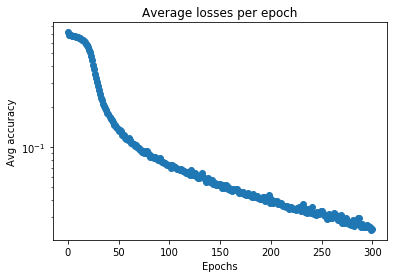

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(nn_output.history['loss'], 'o')  # show average losses
plt.title("Average losses per epoch")
plt.xlabel("Epochs")
plt.ylabel("Avg accuracy")
plt.yscale('log')
plt.show()
plt.close()

## Evaluate the NN

In [9]:
# find predictions on test set
pred = nn.predict(np.array(x_test))

acc = 0
for i in range(len(y_test)):
    if round(pred[i]) == y_test[i][0]:
        acc += 1

print("Validation Accuracy: {0:.2f}".format(float(acc)/float(len(y_test))))

for i in range(len(x_test)):
    print("{}:  \t(Actual, Prediction): ({}, {})".format(x_test[i], y_test[i][0], int(round(pred[i][0]))))

print("\nEvaluation complete!")

Validation Accuracy: 0.98
[-4, 7]:  	(Actual, Prediction): (1, 1)
[5, 9]:  	(Actual, Prediction): (0, 0)
[-2, 2]:  	(Actual, Prediction): (1, 1)
[-4, -5]:  	(Actual, Prediction): (0, 0)
[8, 7]:  	(Actual, Prediction): (0, 0)
[10, 9]:  	(Actual, Prediction): (0, 0)
[2, 0]:  	(Actual, Prediction): (1, 1)
[5, -1]:  	(Actual, Prediction): (1, 1)
[-1, 4]:  	(Actual, Prediction): (1, 1)
[-6, -10]:  	(Actual, Prediction): (0, 0)
[-5, 6]:  	(Actual, Prediction): (1, 1)
[8, -6]:  	(Actual, Prediction): (1, 1)
[9, -4]:  	(Actual, Prediction): (1, 1)
[-6, -3]:  	(Actual, Prediction): (0, 0)
[-7, 9]:  	(Actual, Prediction): (1, 1)
[2, 5]:  	(Actual, Prediction): (0, 0)
[-5, 4]:  	(Actual, Prediction): (1, 1)
[7, -9]:  	(Actual, Prediction): (1, 1)
[3, 8]:  	(Actual, Prediction): (0, 0)
[-8, 5]:  	(Actual, Prediction): (1, 1)
[5, -4]:  	(Actual, Prediction): (1, 1)
[2, -5]:  	(Actual, Prediction): (1, 1)
[8, 5]:  	(Actual, Prediction): (0, 0)
[-8, -10]:  	(Actual, Prediction): (0, 0)
[-5, -10]:  	(

## Plot prediction of NN on all data   

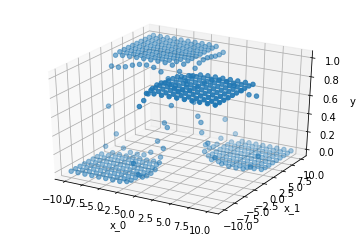

In [10]:
x_all = [e[0] for e in all_data]
pred = nn.predict(np.array(x_all))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([e[0][0] for e in all_data], [e[0][1] for e in all_data], [e[0] for e in pred])
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')

plt.show()
plt.close()